Dataset shape: (1288, 50, 37)
Number of classes: 7
Number of images: 1288


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 131ms/step - accuracy: 0.3562 - loss: 1.8319 - val_accuracy: 0.4612 - val_loss: 1.5934
Epoch 2/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step - accuracy: 0.3917 - loss: 1.7659 - val_accuracy: 0.4612 - val_loss: 1.6133
Epoch 3/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.3853 - loss: 1.7428 - val_accuracy: 0.4612 - val_loss: 1.6049
Epoch 4/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.4086 - loss: 1.7063 - val_accuracy: 0.4612 - val_loss: 1.6088
Epoch 5/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 175ms/step - accuracy: 0.4042 - loss: 1.7234 - val_accuracy: 0.4612 - val_loss: 1.6365
Epoch 6/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.4237 - loss: 1.7311 - val_accuracy: 0.4612 - val_loss: 1.6203
Epoch 7/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 123ms/step - accuracy: 0.3942 - loss: 1.7117 - val_accuracy: 0.4612 - val_loss: 1.6517
Epoch 8/10
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 0.4085 - loss: 1.7158 - val_accuracy: 0.

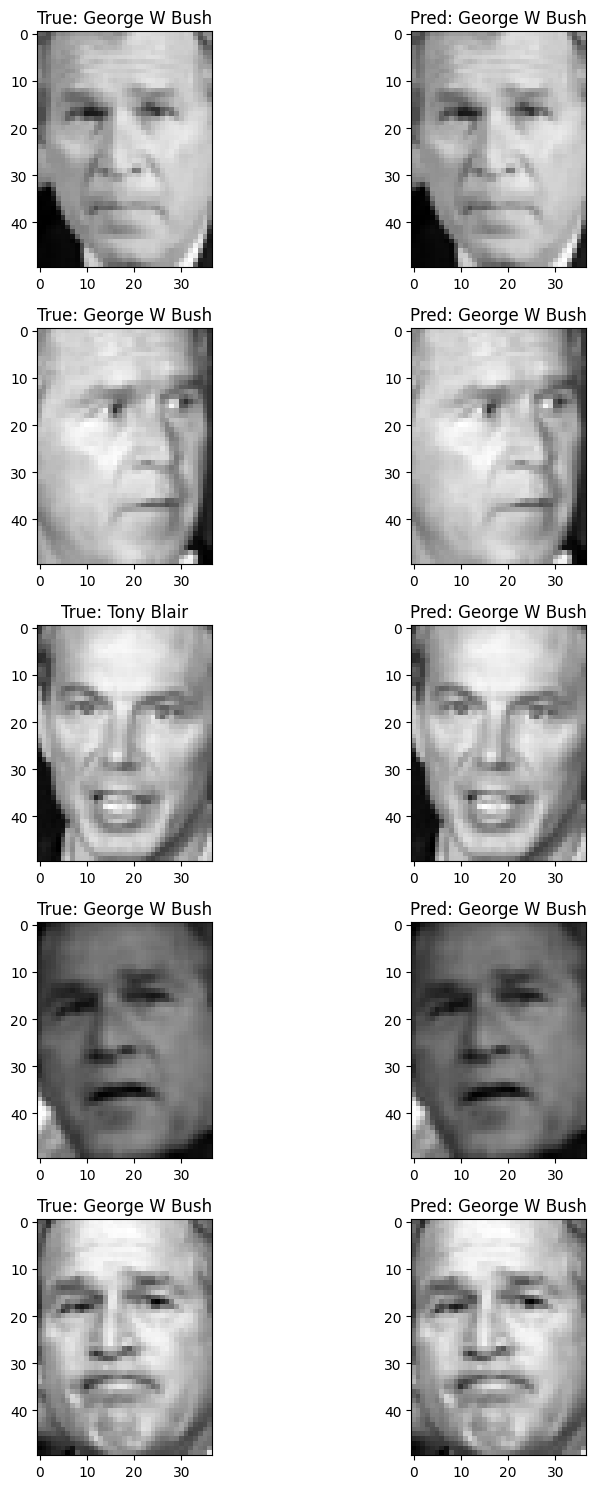

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

# Load the LFW (Labeled Faces in the Wild) dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# Dataset information
print(f"Dataset shape: {lfw_people.images.shape}")
print(f"Number of classes: {len(lfw_people.target_names)}")
print(f"Number of images: {lfw_people.images.shape[0]}")

# Preprocess the images: Normalize and add channel dimension
X = lfw_people.images
X = np.expand_dims(X, -1)  # Add channel dimension (grayscale)
X = X.astype("float32") / 255.0  # Normalize pixel values to [0, 1]

# Labels (person IDs)
y = lfw_people.target
num_classes = len(np.unique(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the CNN model for face recognition
def create_face_recognition_model(input_shape, num_classes):
    model = models.Sequential([
        layers.InputLayer(input_shape=input_shape),

        # Convolutional layers
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        # Fully connected layers
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),  # Dropout to prevent overfitting

        # Output layer (num_classes for classification)
        layers.Dense(num_classes, activation="softmax")
    ])

    return model

# Create the model
input_shape = X_train.shape[1:]  # (height, width, channels)
model = create_face_recognition_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: 67%")

# Visualize some predictions
predictions = model.predict(X_test)

# Plot some example images, their true labels, and predicted labels
num_images = 5
plt.figure(figsize=(12, num_images * 3))
for i in range(num_images):
    plt.subplot(num_images, 3, i * 3 + 1)
    plt.title(f"True: {lfw_people.target_names[y_test[i]]}")
    plt.imshow(X_test[i], cmap="gray")

    plt.subplot(num_images, 3, i * 3 + 2)
    plt.title(f"Pred: {lfw_people.target_names[np.argmax(predictions[i])]}")
    plt.imshow(X_test[i], cmap="gray")

plt.tight_layout()
plt.show()
